In [1]:
import networkx as nx
import matplotlib.pyplot as plt 

In [2]:

def add_vertex(v):                             # Add a vertex to the set of vertices and the graph
  global graph
  global vertices_no
  global vertices
  if v in vertices:
    print("Vertex ", v, " already exists")
  else:
    vertices_no = vertices_no + 1
    vertices.append(v)
    if vertices_no > 1:
        for vertex in graph:
            vertex.append(0)
    temp = []
    for i in range(vertices_no):
        temp.append(0)
    graph.append(temp)
    
def add_edge(v1, v2):                              # Add an edge between vertex v1 and v2 with edge weight e
    global graph
    global vertices_no
    global vertices
    global edges
    if v1 not in vertices:                            # Check if vertex v1 is a valid vertex
        print("Vertex ", v1, " does not exist.")
    elif v2 not in vertices:                           # Check if vertex v1 is a valid vertex
        print("Vertex ", v2, " does not exist.")
 
    else:
        index1 = vertices.index(v1)
        index2 = vertices.index(v2)
        graph[index1][index2] = 1
        graph[index2][index1] = 1
        edges.append([v1,v2])        

vertices = []                                         # to store the vertices into the graph
vertices_no = 0                                       # to store the number of vertices in the graph
graph = []
edges=[]
add_vertex(1)       #adding vertices to graph          
add_vertex(2)
add_vertex(3)
add_vertex(4)
add_vertex(5)
add_vertex(6)
add_vertex(7)
add_vertex(8)
add_edge(1, 2)           # Add the edges between the vertices by specifying
add_edge(1, 3)           # the from and to vertex along with the edge weights.
add_edge(2, 3)
add_edge(3, 4)
add_edge(4, 1)
add_edge(7, 8)
add_edge(3, 6)
add_edge(3, 8)
add_edge(1, 6)
add_edge(2, 5)

print(graph)
cdict=dict()
for i in range(8):
    cdict[i+1]=[[i+1],0]
print(cdict)
dcmatrix=[]
for i in range(8):
    dcmatrix.append(graph[i].count(1))
print(dcmatrix)

[[0, 1, 1, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0]]
{1: [[1], 0], 2: [[2], 0], 3: [[3], 0], 4: [[4], 0], 5: [[5], 0], 6: [[6], 0], 7: [[7], 0], 8: [[8], 0]}
[4, 3, 5, 2, 1, 2, 1, 2]


In [3]:


def modularity(m1,m2,cdict,dcmatrix,m,graph):
    
    v1=cdict[m1]
    v2=cdict[m2]
    temp=v1[1]+v2[1]
    for i in v1[0]:
        for j in v2[0]:
            if(graph[i-1][j-1]==1):
                temp+=1
    
    
                
    dc=0
    for i in v1[0]:
        dc+=dcmatrix[i-1]
    for j in v2[0]:
        dc+=dcmatrix[j-1]
    
    
        
        
    q=(temp/m)-(dc/(2*m))**2
    
    for i in cdict.keys():
        if i==m1 or i==m2:
            continue
        else:
            td=0
            for j in (cdict[i][0]):
                td+=dcmatrix[j-1]
               
            q+=(cdict[i][1]/m)-(td/(2*m))**2
    return [q,m1,m2]
k=2
while len(cdict)>k:
    qmax=-999999
    list1=list(cdict.keys())
    print(list1)
    
    le=len(list1)
    m=10
    for i in range(le-1):
        for j in range(i+1,le):
            l=modularity(list1[i],list1[j],cdict,dcmatrix,m,graph)
            if(l[0]>qmax):
                qmax=l[0]
                finalclus=[l[1],l[2]]
    cdict[finalclus[0]][0].extend(cdict[finalclus[1]][0])
    del cdict[finalclus[1]]
    print(finalclus[0],finalclus[1])
    print(cdict)
    tl=cdict[finalclus[0]][0]
    templi=0
    for i in range(len(tl)-1):
        for j in range(i+1,len(tl)):
            if graph[i-1][j-1]:
                templi+=1
    cdict[finalclus[0]][1]=templi





[1, 2, 3, 4, 5, 6, 7, 8]
7 8
{1: [[1], 0], 2: [[2], 0], 3: [[3], 0], 4: [[4], 0], 5: [[5], 0], 6: [[6], 0], 7: [[7, 8], 0]}
[1, 2, 3, 4, 5, 6, 7]
2 5
{1: [[1], 0], 2: [[2, 5], 0], 3: [[3], 0], 4: [[4], 0], 6: [[6], 0], 7: [[7, 8], 0]}
[1, 2, 3, 4, 6, 7]
1 4
{1: [[1, 4], 0], 2: [[2, 5], 0], 3: [[3], 0], 6: [[6], 0], 7: [[7, 8], 0]}
[1, 2, 3, 6, 7]
3 6
{1: [[1, 4], 0], 2: [[2, 5], 0], 3: [[3, 6], 0], 7: [[7, 8], 0]}
[1, 2, 3, 7]
1 3
{1: [[1, 4, 3, 6], 0], 2: [[2, 5], 0], 7: [[7, 8], 0]}
[1, 2, 7]
1 2
{1: [[1, 4, 3, 6, 2, 5], 4], 7: [[7, 8], 0]}


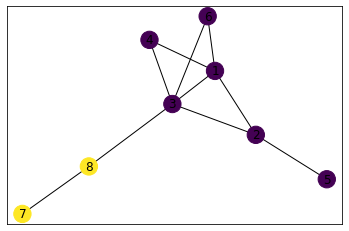

In [4]:
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
col=[0]*len(vertices)
k=1
for i in cdict.values(): 
    
    for b in i[0]:
        col[b-1]=k
    k=k+1


nx.draw_networkx(G,node_color=col)